# Gabriel Alvarez Castrillo C00368 Examen I - Segunda Parte


In [1]:
import numpy as np
import matplotlib.pyplot as plt


La **cuadratura de Gauss** es un método numérico para aproximar integrales definidas. La fórmula general para la cuadratura es:

$$
\int_a^b \, \mathrm{d}x \, f(x) \approx \sum_{k=1}^{N+1} w_k f(x_k)
$$

donde:

  * $ w_k $ son los *pesos* de cada punto de muestra.

  * $ x_k $ son los *puntos de muestreo*, que son las raíces de los polinomios de Legendre $$P_N(x)$$


Para la **cuadratura Gaussiana**:

  * Los puntos de muestreo no son equidistantes, lo que permite más grados de libertad para la misma discretización en  N  subintervalos.
  * La cuadratura Gaussiana es exacta para un polinomio de orden  $(2N - 1)$ .
  * Esto implica que la cuadratura Gaussiana tiene la misma precisión que un polinomio de orden  $(2N - 1) $, lo que es una mejora significativa en comparación con los métodos de Newton-Cotes.

### Elección de los Puntos de Muestreo y Pesos

Para la cuadratura Gaussiana, los puntos y los pesos se eligen de manera especial:

  * Los puntos de muestreo $ x_k $ corresponden a las $ N $ raíces de los polinomios de Legendre $ P_N(x) $ de orden $ N $.
  * Los pesos $ w_k $ se calculan usando la fórmula:
  
  $$
  w_k = \left[ \frac{2}{1 - x^2} \left( \frac{dP_N}{dx} \right)^{-2} \right]_{x = x_k}
  $$

  donde $ x_k $ es una raíz tal que $ P_N(x_k) = 0 $. Este es un aspecto crucial que hace que la cuadratura Gaussiana sea eficiente y precisa.

Se desea resolver la siguiente integral mediante cuadratura gaussiana $$ \int_{0}^{\infty} e^{-t^2}dt $$
realizando el cambio de variable z = t/(1+t), los nuevos límites son de cero a uno.
El método a usar es cuadratura Gaussian por lo que primero se calculan los pesos y puntos de muestreo usando la función gaussxw(), vista en clase, luego se escalan en el intervalo [0,1] con gaussxwab() y con ello se logra aproximar la integral.

In [3]:
def gaussxw(N):
    """
    Calcula los puntos de colocación (x_k) y los pesos (w_k) para la cuadratura de Gauss.

    Este método utiliza una aproximación inicial seguida de un método de Newton para 
    calcular las raíces de los polinomios de Legendre. Luego, se calculan los pesos 
    asociados a estas raíces.

    Args:
        N (int): El número de puntos de colocación (orden de la cuadratura).

    Returns:
        tuple: Un tuple con dos elementos:
            - x (ndarray): Los puntos de colocación de Gauss.
            - w (ndarray): Los pesos asociados a los puntos de colocación.
    
    """
    # Aproximación inicial de los puntos
    a = np.linspace(3, 4 * (N - 1), N) / ((4 * N) + 2)
    x = np.cos(np.pi * a + 1 / (8 * N * N * np.tan(a)))

    # Método de Newton para calcular las raíces de los polinomios de Legendre
    epsilon = 1e-15  # Tolerancia para la convergencia
    delta = 1.0
    while delta > epsilon:
        p0 = np.ones(N, dtype = float)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1)
        dp = (N + 1) * (p0 - x * p1) / (1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = np.max(np.abs(dx))

    # Cálculo de los pesos asociados a los puntos
    w = 2 * (N + 1) * (N + 1) / (N * N * (1 - x * x) * dp * dp)

    return x, w

In [4]:
def gaussxwab(a, b, x, w):
    """
    Reescala los puntos y pesos de la cuadratura de Gauss al intervalo [a, b].

    Esta función toma los puntos de colocación (x) y los pesos (w) calculados para 
    el intervalo estándar [-1, 1] y los transforma para que correspondan al intervalo 
    [a, b].

    Args:
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        x (ndarray): Los puntos de colocación de Gauss en el intervalo [-1, 1].
        w (ndarray): Los pesos asociados a los puntos de colocación en el intervalo [-1, 1].

    Returns:
        tuple: Un tuple con dos elementos:
            - x (ndarray): Los puntos de colocación reescalados al intervalo [a, b].
            - w (ndarray): Los pesos reescalados para el intervalo [a, b].
    
    """
    return 0.5 * (b - a) * x + 0.5 * (b + a), 0.5 * (b - a) * w

In [5]:
def func_integrar(z):

    """
    Función a integrar en la cuadratura de Gauss.

    Esta es la función definida para realizar la integración utilizando la 
    cuadratura de Gauss.

    Args:
        z (ndarray): Los puntos en los cuales se evalúa la función.

    Returns:
        func_integrar (ndarray): Los valores de la función evaluados en los puntos z.

    """
    
    return np.exp(-(z/(1-z))**2)/(1-z)**2

In [ ]:
# Main Code
lim_inf = 0  # Límite inferior de la integral
lim_sup = 1  # Límite superior de la integral

# Se crea un vector de valores de N de 1 a 50
N_list = np.arange(2,51)

# Se crea un vector de ceros del mismo tamaño que N
Int_list = np.zeros(len(N_list))

# Evaluación para distintos valores de N
for i in range(0, len(N_list)):

    # Calcular puntos de colocación y pesos utilizando la cuadratura de Gauss
    p_muest, pesos = gaussxw(N_list[i])

    # Escalar los puntos y pesos al intervalo [0, 1]
    pto_esc, peso_esc = gaussxwab(lim_inf, lim_sup, p_muest, pesos)

    # Evaluar la integral usando los puntos y pesos escalados
    Int_list[i] = np.sum(peso_esc * func_integrar(pto_esc))

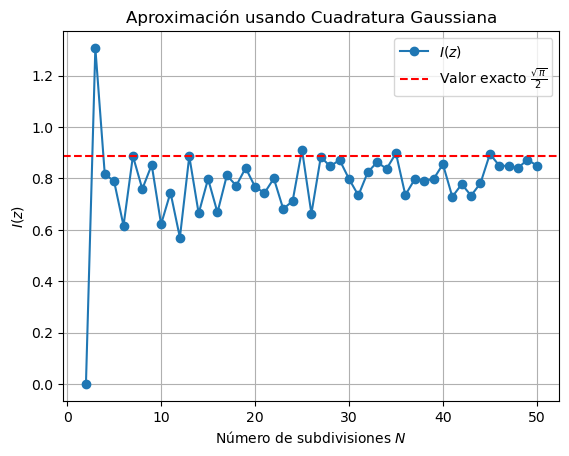

In [12]:
# Grafica I(z) en función de N
plt.figure()
plt.plot(N_list, Int_list, 'o-', label=r'$I(z)$')  # 'o-' para puntos y líneas
plt.axhline(y=np.sqrt(np.pi)/2, color='r', linestyle='--', label=r'Valor exacto $\frac{\sqrt{\pi}}{2}$')
plt.xlabel(r'Número de subdivisiones $N$')
plt.ylabel(r'$I(z)$')
plt.title(r'Aproximación usando Cuadratura Gaussiana')
plt.legend()
plt.grid(True) 
plt.show()


### Análisis  

Cuando el número de particiones es pequeño, la aproximación presenta oscilaciones notables alrededor del valor exacto. Este comportamiento es típico en los métodos numéricos que no pueden seguir con precisión los cambios de la función en intervalos grandes. La falta de suficientes puntos de muestreo provoca una representación errónea en las cercanías del punto donde la función tiene su mayor variación.

Este método es especialmente eficiente para polinomios, ya que la cuadratura de Gauss proporciona el valor exacto para cualquier polinomio de grado hasta $( 2N - 1 )$, donde $N$ es el número de puntos de muestreo. Sin embargo, en nuestro caso, la precisión de la aproximación depende de qué tan bien portada esté la función y de qué tan bien pueda representarse mediante los polinomios de Legendre utilizados en la cuadratura.
 
